## Isotopic fingerprinting analysis

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import numpy as np
from statsmodels.multivariate.manova import MANOVA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

#### Update 05/2020 -> Use MANOVA on AA data

### Full Script for LDA

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Importing the dataset
dataset = pd.read_csv('~/Documents/GitHub/data/schiff c-csiaa data from schiff_larsen_in prog.csv')
dataset = dataset[['Group ID','Group ID2','Group ID3', 'Ile', 'Leu', 'Phe', 'Thr','Val']]

# Splitting the dataset into the Training set and Test set
X = 
y = 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

SyntaxError: invalid syntax (<ipython-input-2-822e2045d11e>, line 13)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Full Script for PCA
Compiled from code below.

02/22/2020 -- Still working out some kinks but almost there, df_test vs. df_train issue
02/22/2020 -- Subtract the mean and THEN do the standard scaler?

[0.63483062 0.21201881]


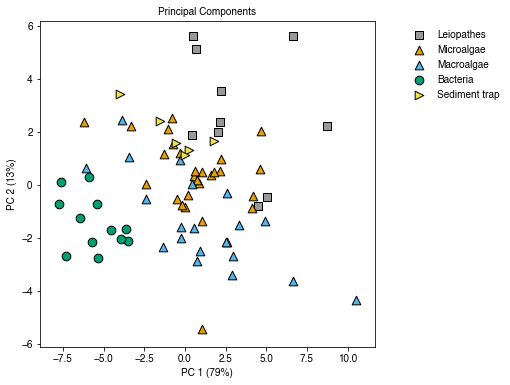

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Import data
df = pd.read_csv('~/Documents/GitHub/data/schiff c-csiaa data from schiff_and_literature.csv')
corals = df[df['Group ID2'] == 'Leiopathes']
# corals.head

#-------- Calculate EAA and NEAA --------#
corals = corals[['Group ID','Group ID2', 'Bulk', 'Ala', 'Asx', 'Glx', 'Gly', 'Ser', 'Pro', 'Ile', 'Leu', 'Lys', 'Phe', 'Thr', 'Tyr', 'Val', 'Year CE']]
eaa = corals[['Phe', 'Thr', 'Ile', 'Leu', 'Val']]
neaa = corals[['Asx', 'Glx', 'Pro', 'Ala', 'Ser', 'Gly']]

columns = corals.columns
# print(columns)
# print(corals)
# print(eaa)
# print(neaa)

corals["eaa"] = np.mean(eaa, axis = 1)
corals["neaa"] = np.mean(neaa, axis = 1)

#--------- Create a training dataset ---------#
df_train = df[(df['Group ID2'] == 'Bacteria') | (df['Group ID2'] == 'Microalgae') | (df['Group ID2'] == 'Macroalgae')]
df_train = df_train[['Group ID2', 'Phe', 'Thr', 'Ile', 'Leu', 'Val']] # EAAs only for PCA (McMahon et al, 2015)
# df_train


#--------- Standardization ----------#
param1 = 'Leiopathes'
param2 = 'Microalgae'
param3 = 'Macroalgae'
param4 = 'Bacteria'
param5 = 'Sediment trap'

grouping = 'Group ID2'

df_test = df[(df[grouping] == param1) | 
             (df[grouping] == param2) |
             (df[grouping] == param3) | (df[grouping] == param4) | (df[grouping] == param5)]
df_test = df_test[[grouping, 'Phe', 'Thr', 'Ile', 'Leu', 'Val']] # EAAs only for PCA (McMahon et al, 2015)

train_eaa = df_test[['Phe', 'Thr', 'Ile', 'Leu', 'Val']]
train_eaa = np.mean(train_eaa, axis = 1)
train_eaa = train_eaa[:, np.newaxis]
train_eaa.shape # should be (60,1) now instead of (60,)

df_norm = df_test[['Phe', 'Thr', 'Ile', 'Leu', 'Val']]
df_norm = df_norm - train_eaa


#--------- PCA ----------#
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(df_norm)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

groups = df_test[[grouping]]
groups = groups.reset_index(drop = True) # index numbers were weird and interfering

finalDf = pd.concat([principalDf, groups], axis = 1)

#--------- Plotting -----------#
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1 (79%)', fontsize = 10)
ax.set_ylabel('PC 2 (13%)', fontsize = 10)
ax.set_title('Principal Components', fontsize = 10)

targets = [param1, param2, param3, param4, param5]
labels = targets
colors = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
markers = ['s', '^', '^', 'o', '>', '<']

for target, color, point in zip(targets,colors,markers):
    indicesToKeep = finalDf[grouping] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 75, marker = point,
               edgecolor = "black")
ax.legend(labels, frameon = False, bbox_to_anchor=(1.4,1))
# ax.grid()

print(pca.explained_variance_ratio_)
plt.savefig('fig_pca_stetson.png', dpi=300, bbox_inches='tight')

In [2]:
# Import data
df = pd.read_csv('~/Documents/GitHub/data/schiff c-csiaa data from schiff_and_literature.csv')

In [3]:
corals = df[df['Group ID2'] == 'Leiopathes']
corals.head

<bound method NDFrame.head of           Group ID   Group ID2    Category  Source       Region   Bulk  \
131    STET-4904 7  Leiopathes  Leiopathes  Schiff  Gulf Stream -16.99   
132    STET-4904 8  Leiopathes  Leiopathes  Schiff  Gulf Stream -16.51   
133   STET-4904 22  Leiopathes  Leiopathes  Schiff  Gulf Stream -15.79   
134   STET-4904 25  Leiopathes  Leiopathes  Schiff  Gulf Stream -15.84   
135   STET-4904 40  Leiopathes  Leiopathes  Schiff  Gulf Stream -15.31   
136   STET-4904 46  Leiopathes  Leiopathes  Schiff  Gulf Stream -15.39   
137  STET-4904 103  Leiopathes  Leiopathes  Schiff  Gulf Stream -15.58   
138  STET-4904 109  Leiopathes  Leiopathes  Schiff  Gulf Stream -15.39   
139  STET-4904 135  Leiopathes  Leiopathes  Schiff  Gulf Stream -15.57   
140  STET-4904 170  Leiopathes  Leiopathes  Schiff  Gulf Stream -15.72   

           Ala  Ala.sd        Asx  Asx.sd  ...  Met.sd        Phe  Phe.sd  \
131 -14.987193     NaN -13.678990     NaN  ...     NaN -19.623750     NaN   
1

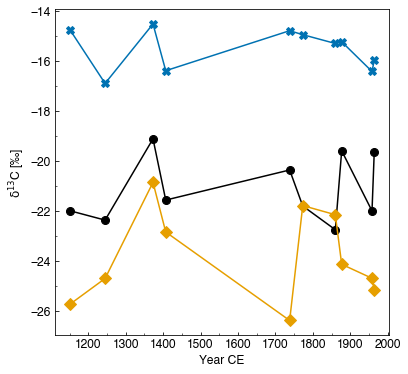

In [9]:
mpl.rc('font',family='Helvetica')

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot() 
markersize = 8
ax.plot('Year CE', 'Phe', data = corals, marker = 'o', color = '#000000', markersize = markersize)
ax.plot('Year CE', 'Leu', data = corals, marker = 'D', color = '#E69F00', markersize = markersize)
# ax.plot('Year CE', 'Ile', data = corals, marker = '^', color = '#CC79A7', markersize = markersize)
# ax.plot('Year CE', 'Val', data = corals, marker = '<', color = '#009E73', markersize = markersize)
# ax.plot('Year CE', 'Thr', data = corals, marker = 'X', color = '#D55E00', markersize = markersize)
ax.plot('Year CE', 'eaa', data = corals, marker = 'X', color = '#0072B2', markersize = markersize)

ax.set_xlabel("Year CE", size = 12)
ax.set_ylabel(r'$\mathrm{\delta}^{13}$C ['u"\u2030]", size = 12)
for tick in ax.get_xticklabels():
#     tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
#     tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
    
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(direction='in', which = 'both')

plt.savefig('fig_eaa_thru_time.png', dpi = 300, bbox_inches = 'tight')

### Calculate average NEAA and EAA

In [5]:
corals = corals[['Group ID','Bulk', 'Ala', 'Asx', 'Glx', 'Gly', 'Ser', 'Pro', 'Ile', 'Leu', 'Lys', 'Phe', 'Thr', 'Tyr', 'Val', 'Year CE']]
eaa = corals[['Phe', 'Thr', 'Ile', 'Leu', 'Val']]
neaa = corals[['Asx', 'Glx', 'Pro', 'Ala', 'Ser', 'Gly']]

columns = corals.columns
print(columns)

# print(corals)
print(eaa)
print(neaa)

corals["eaa"] = np.mean(eaa, axis = 1)
corals["neaa"] = np.mean(neaa, axis = 1)

print(corals)

Index(['Group ID', 'Bulk', 'Ala', 'Asx', 'Glx', 'Gly', 'Ser', 'Pro', 'Ile',
       'Leu', 'Lys', 'Phe', 'Thr', 'Tyr', 'Val', 'Year CE'],
      dtype='object')
           Phe       Thr        Ile        Leu        Val
131 -19.623750 -7.448889 -12.163636 -25.172121 -15.392533
132 -21.996354 -1.860000 -16.820061 -24.690121 -16.709400
133 -19.587812 -4.630303 -12.309727 -24.130273 -15.469500
134 -22.747031 -5.781667  -9.529455 -22.147182 -16.270700
135 -21.797734 -0.220303 -15.017182 -21.781455 -15.897200
136 -20.357031  1.686869 -12.158030 -26.378636 -16.711833
137 -21.560859 -4.580303 -12.473273 -22.838000 -20.469200
138 -19.111016 -4.384091 -12.110909 -20.853273 -16.111000
139 -22.362500 -5.630303 -14.977455 -24.698545 -16.792400
140 -21.988047 -0.651768  -8.972879 -25.730152 -16.371833
           Asx        Glx        Pro        Ala       Ser       Gly
131 -13.678990  -8.459123 -16.408000 -14.987193  0.981728  2.082299
132 -16.726869 -12.319649 -14.860467 -15.675000  2.024321 -1.381609

/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [18]:
# So now we have two datasets: the original imported dataframe and the subsetted corals dataframe
print(df)
print(corals)

                    Group ID   Group ID2               Group ID3  \
0                         B1    Bacteria                     NaN   
1                         B2    Bacteria                     NaN   
2                         B3    Bacteria                     NaN   
3                         B4    Bacteria                     NaN   
4                         B5    Bacteria                     NaN   
..                       ...         ...                     ...   
163          Prochlorococcus  Prokaryote           Non-N2 fixing   
164             Rhodococcous  Prokaryote  Heterotrophic bacteria   
165           Actinobacteria  Prokaryote  Heterotrophic bacteria   
166  Burkholderia xenovorans  Prokaryote  Heterotrophic bacteria   
167         Escherichia coli  Prokaryote  Heterotrophic bacteria   

            Group ID4        Group ID5       Source Region  Bulk   Ala  \
0        Burkholderia              NaN  Larsen 2013    NaN   NaN -11.3   
1    Methylobacterium              

In [5]:
# Create a training dataset
df_train = df[(df['Group ID2'] == 'Bacteria') | (df['Group ID2'] == 'Microalgae') | (df['Group ID2'] == 'Macroalgae')]
df_train = df_train[['Group ID2', 'Phe', 'Thr', 'Ile', 'Leu', 'Val']] # EAAs only for PCA (McMahon et al, 2015)
df_train

,Group ID2,Phe,Thr,Ile,Leu,Val
0,Bacteria,-18.8,-5.2,-12.0,-12.8,-13.6
1,Bacteria,-17.0,-8.2,-12.9,-13.0,-14.1
2,Bacteria,-24.6,-15.0,-18.9,-19.9,-20.8
3,Bacteria,-28.9,-15.1,-23.7,-25.2,-26.4
4,Bacteria,-18.3,-8.3,-16.1,-17.7,-17.8
5,Bacteria,-20.1,-8.6,-17.1,-19.2,-21.1
6,Bacteria,-18.5,-7.4,-15.6,-17.4,-19.0
7,Bacteria,-17.7,-7.8,-16.1,-15.9,-17.7
8,Bacteria,-27.0,-16.8,-21.2,-24.1,-25.1
9,Bacteria,-20.9,-12.2,-18.6,-17.4,-21.4


### Normalized training dataframe
https://bic-berkeley.github.io/psych-214-fall-2016/subtract_means.html

https://medium.com/@ian.dzindo01/what-is-numpy-newaxis-and-when-to-use-it-8cb61c7ed6ae

https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Data_Visualization_Iris_Dataset_Blog.ipynb

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [10]:
# Normalize the values before doing a PCA
train_eaa = df_train[['Phe', 'Thr', 'Ile', 'Leu', 'Val']]
train_eaa = np.mean(train_eaa, axis = 1)
train_eaa = train_eaa[:, np.newaxis]
train_eaa.shape # should be (60,1) now instead of (60,)

df_norm = df_train[['Phe', 'Thr', 'Ile', 'Leu', 'Val']]
df_norm = df_norm - train_eaa

# print(df_train)
# print(df_norm) # normalized training dataframe

In [11]:
# Alternative method of standardization
features = ['Phe', 'Thr', 'Ile', 'Leu', 'Val']
x = df_train.loc[:, features].values
y = df_train.loc[:,['Group ID2']].values
z = StandardScaler().fit_transform(x)
pd.DataFrame(data = z, columns = features).head() # Just return the first few rows
# pd.DataFrame(data = z, columns = features)

# z.shape

# We now have a dataset of standardized essential amino acid isotope data

,Phe,Thr,Ile,Leu,Val
0,0.684785,0.462679,1.113722,1.905537,1.498145
1,1.100740,-0.159759,0.915825,1.865783,1.390105
2,-0.655514,-1.570617,-0.403491,0.494273,-0.057621
3,-1.649184,-1.591365,-1.458943,-0.559205,-1.267661
4,0.800328,-0.180507,0.212190,0.931566,0.590615


In [12]:
# # PCA on data standardized with StandardScaler()
# pca = PCA(n_components = 2)
# principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2'])
# principalDf

In [13]:
# groups = df_train[['Group ID2']]
# groups = groups.reset_index(drop = True) # index numbers were weird and interfering

# finalDf = pd.concat([principalDf, groups], axis = 1)
# finalDf

In [14]:
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 Component PCA', fontsize = 20)

# targets = ['Bacteria', 'Macroalgae', 'Microalgae']
# colors = ['r', 'g', 'b']
# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf['Group ID2'] == target
#     ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#                , finalDf.loc[indicesToKeep, 'principal component 2']
#                , c = color
#                , s = 50, marker = "D")
# ax.legend(targets, frameon = False)
# # ax.grid()

# print(pca.explained_variance_ratio_)

### PCA including black coral data

In [15]:
# Alternative method of standardization

grouping = 'Group ID2'

param1 = 'Leiopathes'
param2 = 'Microalgae'
param3= 'Macroalgae'
param4= 'Bacteria'
param5= 'Sediment trap'
# param6 = 'Microalgae'

df_test = df[(df[grouping] == param1) | 
             (df[grouping] == param2) |
             (df[grouping] == param3) | (df[grouping] == param4) | (df[grouping] == param5)]
df_test = df_test[[grouping, 'Phe', 'Thr', 'Ile', 'Leu', 'Val']] # EAAs only for PCA (McMahon et al, 2015)
df_test

x = df_test.loc[:, features].values
y = df_test.loc[:,[grouping]].values
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head() # Just return the first few rows
# pd.DataFrame(data = x, columns = features)

,Phe,Thr,Ile,Leu,Val
0,0.774629,0.396805,1.016718,2.173692,1.458815
1,1.231429,-0.240973,0.811810,2.130001,1.344175
2,-0.697281,-1.686603,-0.554240,0.622676,-0.191988
3,-1.788524,-1.707862,-1.647081,-0.535124,-1.475946
4,0.901518,-0.262232,0.083250,1.103272,0.495846


In [1]:
# PCA on data standardized with StandardScaler()
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

groups = df_test[[grouping]]
groups = groups.reset_index(drop = True) # index numbers were weird and interfering

finalDf = pd.concat([principalDf, groups], axis = 1)

print(finalDf)

NameError: name 'PCA' is not defined

[0.7889457 0.1285626]


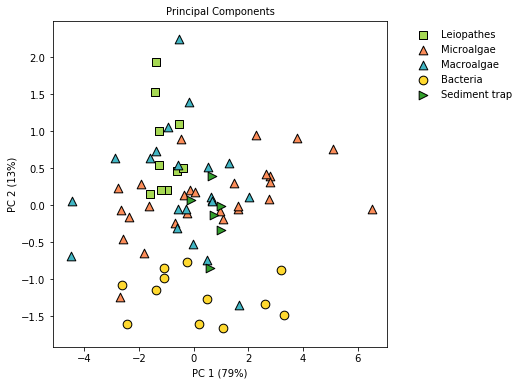

In [17]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1 (79%)', fontsize = 10)
ax.set_ylabel('PC 2 (13%)', fontsize = 10)
ax.set_title('Principal Components', fontsize = 10)

targets = [param1, param2, param3, param4, param5]
labels = targets
colors = ['#a6d854', '#fc8d59', '#41b6c4', '#ffd92f', '#33a02c', '#e31a1c']
markers = ['s', '^', '^', 'o', '>', '<']

for target, color, point in zip(targets,colors,markers):
    indicesToKeep = finalDf[grouping] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 75, marker = point,
               edgecolor = "black")
ax.legend(labels, frameon = False, bbox_to_anchor=(1.4,1))
# ax.grid()

print(pca.explained_variance_ratio_)
plt.savefig('fig_pca_stetson.png', dpi=300, bbox_inches='tight')

In [243]:
components = pd.DataFrame(pca.components_, columns = pd.DataFrame(data = x, columns = features).columns, index=[1, 2])
components

,Phe,Thr,Ile,Leu,Val
1,-0.480918,-0.376757,-0.463735,-0.42191,-0.483439
2,-0.097380,0.787545,0.049427,-0.60544,-0.035914


## Linear discriminant analysis with coral data
https://stackabuse.com/implementing-lda-in-python-with-scikit-learn/

,Group ID,Group ID2,Group ID3,Group ID4,Group ID5,Source,Region,Bulk,Ala,Ala.sd,...,Met.sd,Phe,Phe.sd,Thr,Thr.sd,Tyr,Tyr.sd,Val,Val.sd,Year CE
0,B1,Bacteria,NaN,Burkholderia,NaN,Larsen 2013,NaN,NaN,-11.3,0.1,...,0.1,-18.8,0.0,-5.2,0.8,-16.8,0.1,-13.6,0.1,NaN
1,B2,Bacteria,NaN,Methylobacterium,NaN,Larsen 2013,NaN,NaN,-12.2,0.0,...,0.2,-17.0,0.1,-8.2,1.4,-18.1,0.1,-14.1,0.1,NaN
2,B3,Bacteria,NaN,Klebisella,NaN,Larsen 2013,NaN,NaN,-15.9,0.0,...,0.3,-24.6,0.1,-15.0,0.8,-22.9,0.0,-20.8,0.0,NaN
3,B4,Bacteria,NaN,Rhodococcus,NaN,Larsen 2013,NaN,NaN,-22.6,0.0,...,0.2,-28.9,0.1,-15.1,0.1,-27.7,0.2,-26.4,0.2,NaN
4,B5,Bacteria,NaN,NaN,NaN,Larsen 2013,NaN,NaN,-14.8,0.1,...,0.2,-18.3,0.1,-8.3,0.2,-18.0,0.0,-17.8,0.1,NaN
5,B6,Bacteria,NaN,NaN,NaN,Larsen 2013,NaN,NaN,-18.3,0.1,...,0.2,-20.1,0.1,-8.6,1.3,-20.2,0.1,-21.1,0.0,NaN
6,B7,Bacteria,NaN,NaN,NaN,Larsen 2013,NaN,NaN,-15.3,0.0,...,0.1,-18.5,0.1,-7.4,0.3,-18.3,0.1,-19.0,0.0,NaN
7,B8,Bacteria,NaN,NaN,NaN,Larsen 2013,NaN,NaN,-14.1,0.1,...,0.3,-17.7,0.0,-7.8,0.5,-17.4,0.2,-17.7,0.0,NaN
8,B9,Bacteria,NaN,NaN,NaN,Larsen 2013,NaN,NaN,-18.1,0.1,...,0.3,-27.0,0.0,-16.8,0.2,-25.2,0.1,-25.1,0.1,NaN
9,B10,Bacteria,NaN,NaN,NaN,Larsen 2013,NaN,NaN,-16.5,0.0,...,NaN,-20.9,0.0,-12.2,0.3,-19.7,0.1,-21.4,0.0,NaN


# Temporal records

In [244]:
corals

,Group ID,Group ID2,Group ID3,Bulk,Ala,Asx,Glx,Gly,Ser,Pro,Ile,Leu,Lys,Phe,Thr,Tyr,Val,Year CE,eaa,neaa
131,STET-4904 7,Leiopathes,Leiopathes-post,-16.99,-14.987193,-13.678990,-8.459123,2.082299,0.981728,-16.408000,-12.163636,-25.172121,-15.380435,-19.623750,-7.448889,-20.445104,-15.392533,1977.0,-15.960186,-8.411546
132,STET-4904 8,Leiopathes,Leiopathes-post,-16.51,-15.675000,-16.726869,-12.319649,-1.381609,2.024321,-14.860467,-16.820061,-24.690121,-16.222101,-21.996354,-1.860000,-23.959375,-16.709400,1973.0,-16.415187,-9.823212
133,STET-4904 22,Leiopathes,Leiopathes-post,-15.79,-13.507895,-11.846364,-9.432895,2.991379,0.794259,-15.994100,-12.309727,-24.130273,-18.438587,-19.587812,-4.630303,-20.636198,-15.469500,1915.0,-15.225523,-7.832602
134,STET-4904 25,Leiopathes,Leiopathes-post,-15.84,-15.106360,-14.610303,-10.030000,-1.073276,-1.110000,-14.072300,-9.529455,-22.147182,-18.090870,-22.747031,-5.781667,-18.784297,-16.270700,1902.0,-15.295207,-9.333706
135,STET-4904 40,Leiopathes,Leiopathes-pre,-15.31,-13.953684,-11.951515,-11.204737,0.126897,-1.269815,-12.241200,-15.017182,-21.781455,-21.905797,-21.797734,-0.220303,-17.770703,-15.897200,1841.0,-14.942775,-8.415676
136,STET-4904 46,Leiopathes,Leiopathes-pre,-15.39,-16.468860,-16.849495,-10.318640,-2.486782,6.556790,-12.015833,-12.158030,-26.378636,-23.122826,-20.357031,1.686869,-18.124089,-16.711833,1817.0,-14.783733,-8.597137
137,STET-4904 103,Leiopathes,Leiopathes-pre,-15.58,-14.995614,-13.008030,-9.905526,-1.521839,-0.933704,-13.024200,-12.473273,-22.838000,-24.442754,-21.560859,-4.580303,-20.032552,-20.469200,1583.0,-16.384327,-8.898152
138,STET-4904 109,Leiopathes,Leiopathes-pre,-15.39,-13.162500,-11.740152,-10.976447,1.179310,-1.930556,-12.936600,-12.110909,-20.853273,-25.326304,-19.111016,-4.384091,-19.248281,-16.111000,1559.0,-14.514058,-8.261157
139,STET-4904 135,Leiopathes,Leiopathes-pre,-15.57,-13.617895,-15.207879,-10.237368,0.191034,-4.400741,-12.825600,-14.977455,-24.698545,-19.235507,-22.362500,-5.630303,-19.091771,-16.792400,1451.0,-16.892241,-9.349741
140,STET-4904 170,Leiopathes,Leiopathes-pre,-15.72,-18.261404,-13.758333,-10.202193,-1.752586,6.821296,-11.995167,-8.972879,-25.730152,-14.982971,-21.988047,-0.651768,-19.822396,-16.371833,1309.0,-14.742936,-8.191398


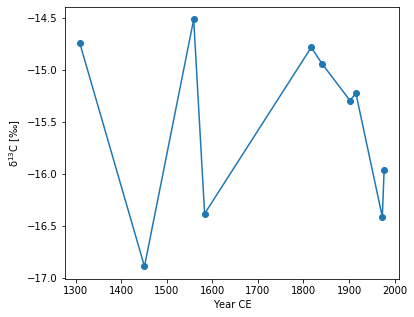

In [9]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.set_xlabel("Year CE")
ax.set_ylabel(r'$\mathrm{\delta}^{13}$C ['u"\u2030]")
plt.plot('Year CE', 'eaa', data = corals, marker = "o")

## Figure. Bulk d15N side-by-side PCA output
Highlight the samples used for d13C-AA in the bulk figure.